Установка библиотек

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Импорты

In [ ]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer

from sklearn.decomposition import PCA
from sklearn.metrics import DistanceMetric

import matplotlib.pyplot as plt
import matplotlib as mpl

Загружаем данные

In [ ]:
TRAIN_DS_PATH = 'train_ds.csv' #НЕ ЗАБУДЬТЕ ЗАГРУЗИТЬ ФАЙЛ
df_q_a = pd.read_csv(TRAIN_DS_PATH)

Генерируем эмбеддинги

In [ ]:
#загружаем pre-trained llm
model = SentenceTransformer("distiluse-base-multilingual-cased-v1")

#encode questions
embedding_arr = model.encode(df_q_a['Question'])
embedding_arr.shape

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

(69, 512)

PCA

In [ ]:
#Уменьшаем количество измерений датасета (метод главных компонент)
pca_full = PCA()
pca_full.fit(embedding_arr)

#Вычисляем explained variance ratio
explained_variance = pca_full.explained_variance_ratio_

In [ ]:
cumulative_explained_variance = np.cumsum(explained_variance)

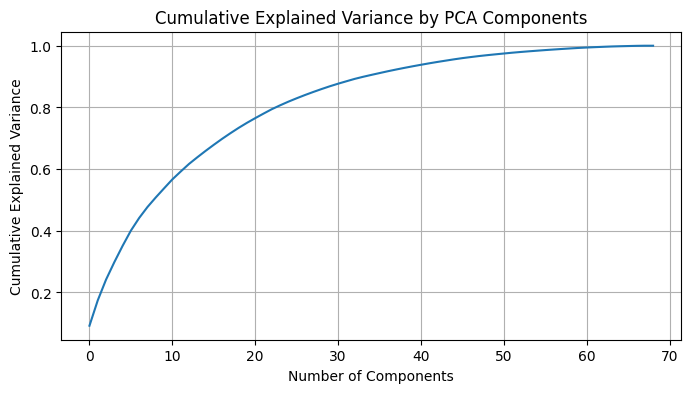

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Вычисляем количество измерений до которых сокращаем
variance_threshold = 0.94

n_components = np.where(cumulative_explained_variance >= variance_threshold)[0][0] + 1

print("Число компонентов, отражающих по меньшей мере 94% вариативности:", n_components)

Число компонентов, отражающих по меньшей мере 94% вариативности: 42


In [ ]:
pca = PCA(n_components=n_components).fit(embedding_arr)
print(pca.explained_variance_ratio_)

[0.09189641 0.08217047 0.06731191 0.05663572 0.05297391 0.0494506
 0.04105392 0.03543668 0.03101469 0.02946617 0.02909672 0.02529729
 0.02455072 0.02157415 0.02080047 0.01993283 0.01926935 0.01823877
 0.01746016 0.01627967 0.0152546  0.01469121 0.01429385 0.0125494
 0.01188544 0.01099403 0.01049399 0.00992004 0.00947419 0.00903631
 0.00835725 0.00786454 0.00773468 0.00667087 0.00618433 0.00598094
 0.0059399  0.00559773 0.00534558 0.00511854 0.00492021 0.00473967]


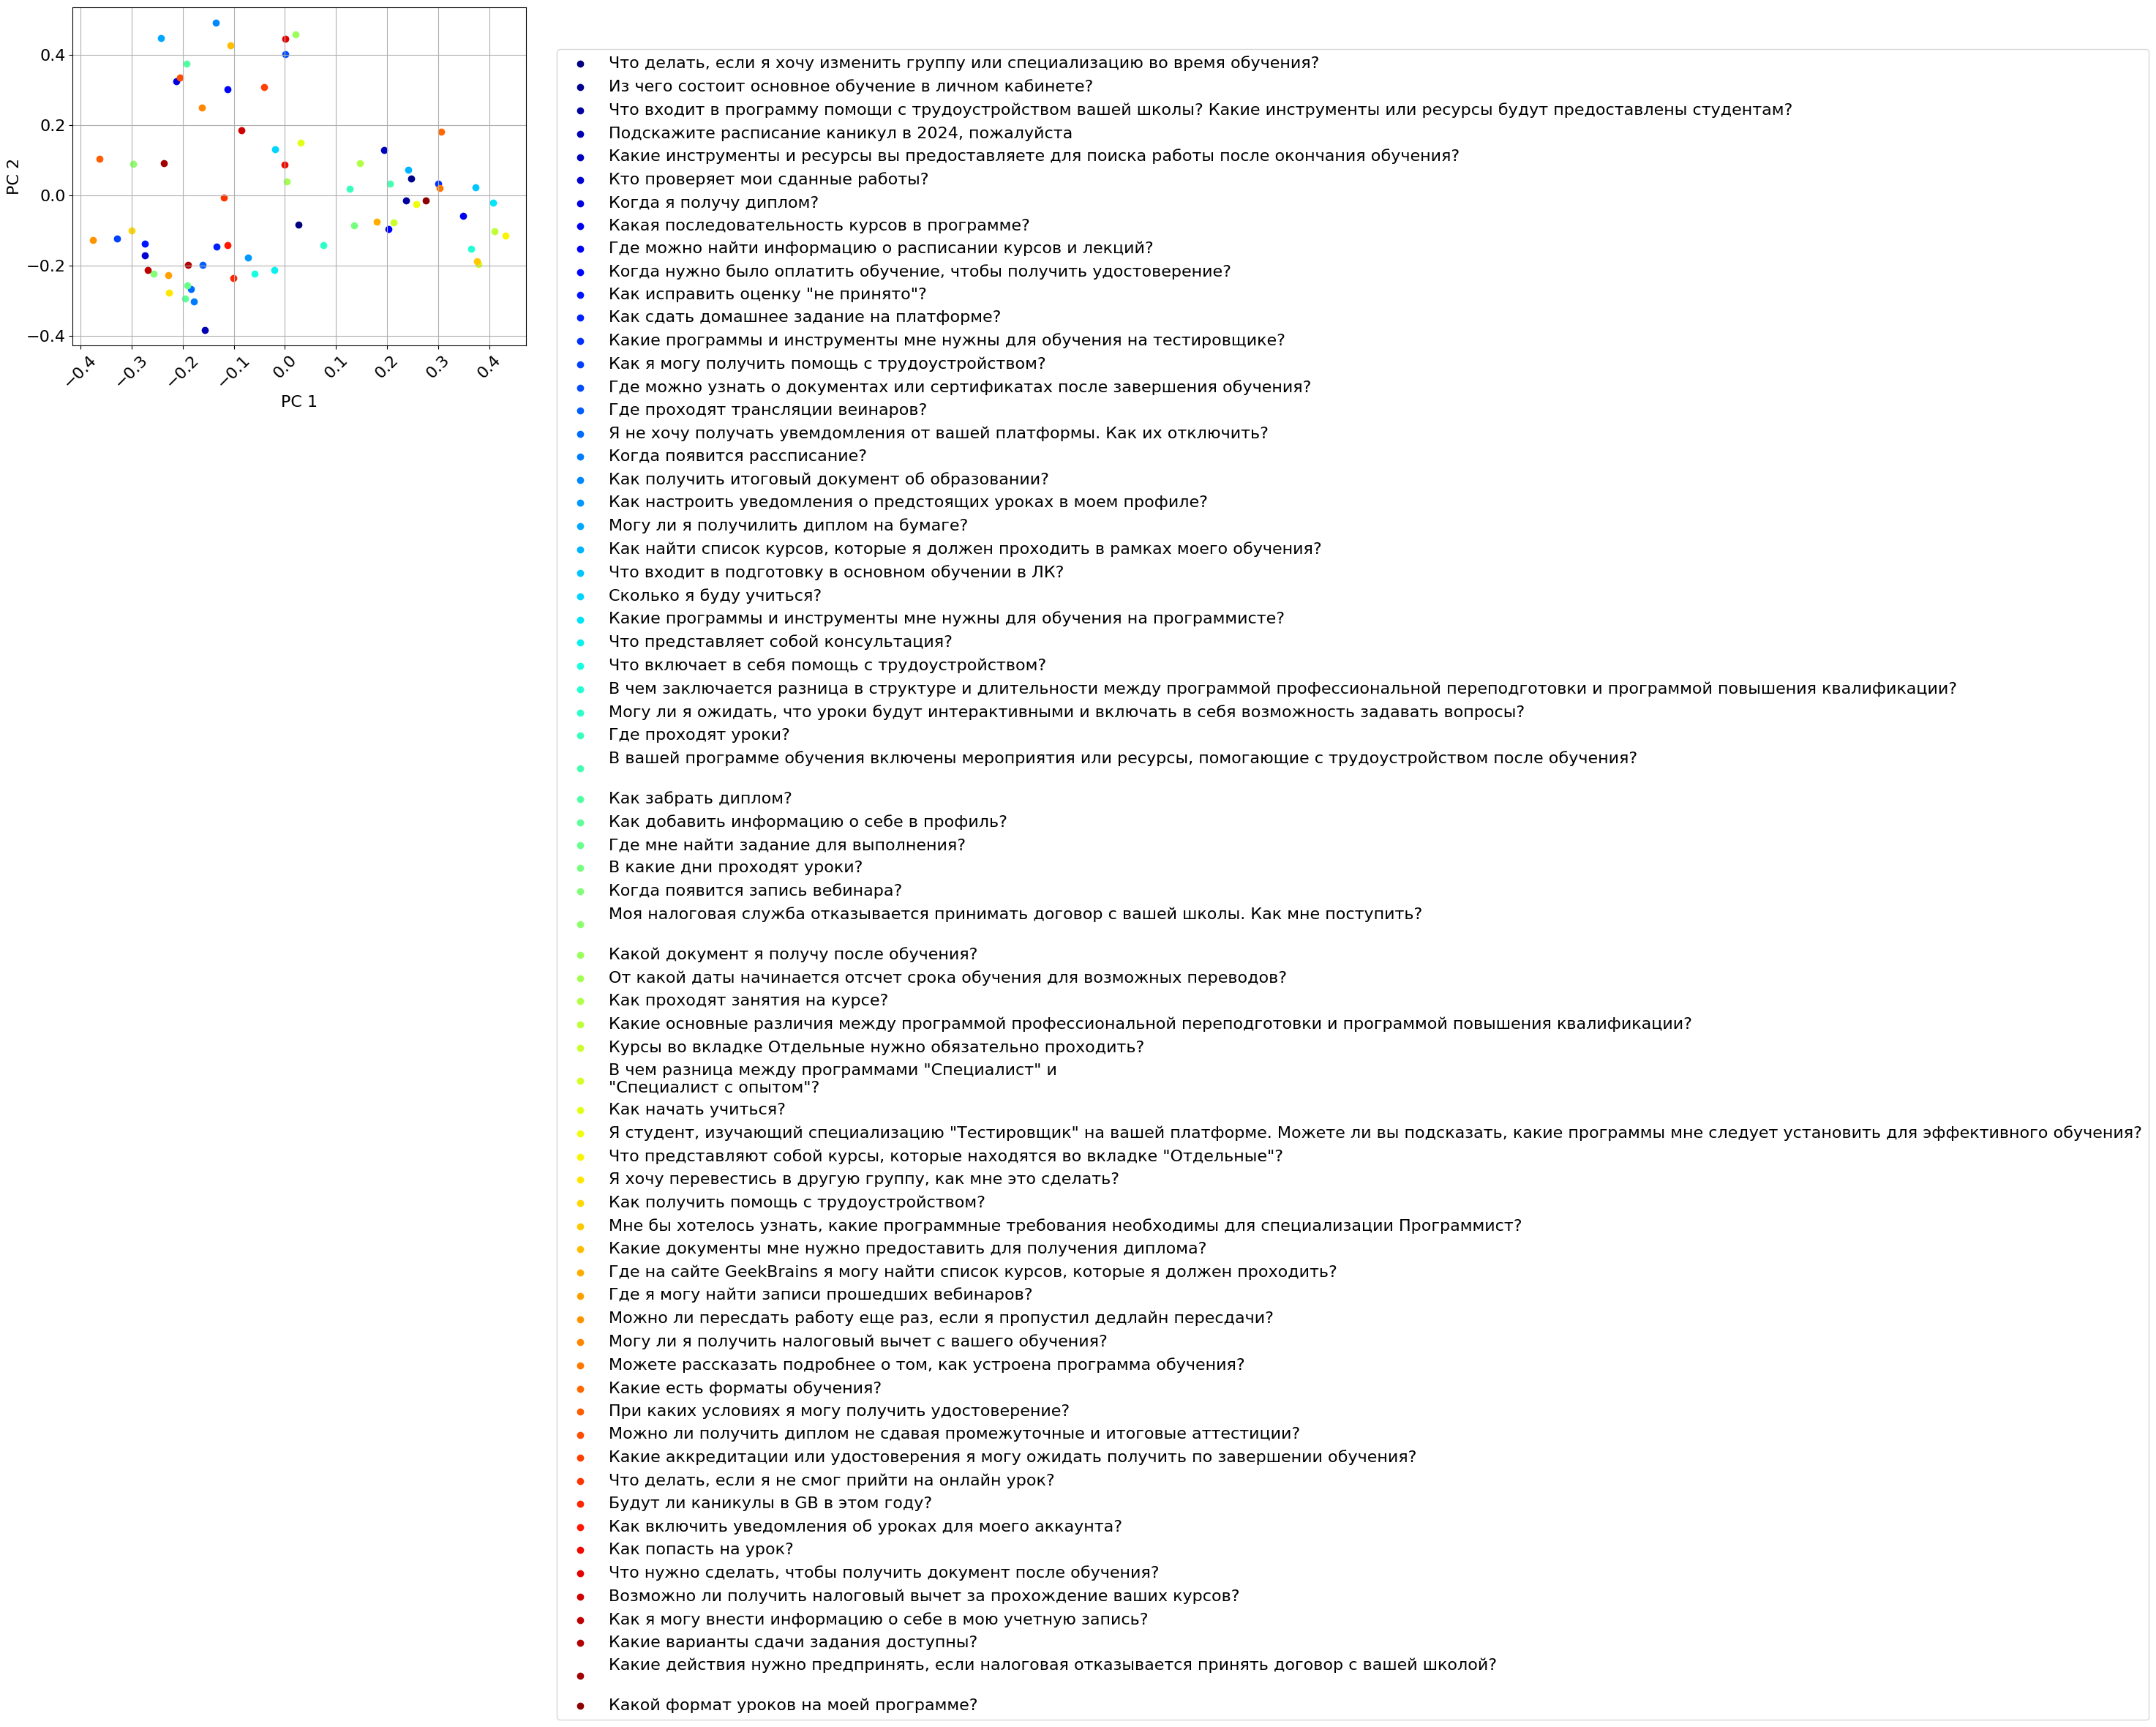

In [ ]:
# визуализация
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in df_q_a['Question'].unique():
    idx = np.where(df_q_a['Question']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(df_q_a['Question'].unique())

plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

Semantic search

In [ ]:
query = "как забрать диплом"


query_embedding = model.encode(query)

Compute Neares Neighbours

In [ ]:
def predict_class(query):
  query = query
  query_embedding = model.encode(query)

  dist = DistanceMetric.get_metric('euclidean')


  dist_arr = dist.pairwise(embedding_arr, query_embedding.reshape(1, -1)).flatten()

  idist_arr_sorted = np.argsort(dist_arr)
  answer_class = df_q_a['answer_class'].iloc[idist_arr_sorted[0]]

  return answer_class


In [ ]:
predict_class("когда получать сертификат")

3

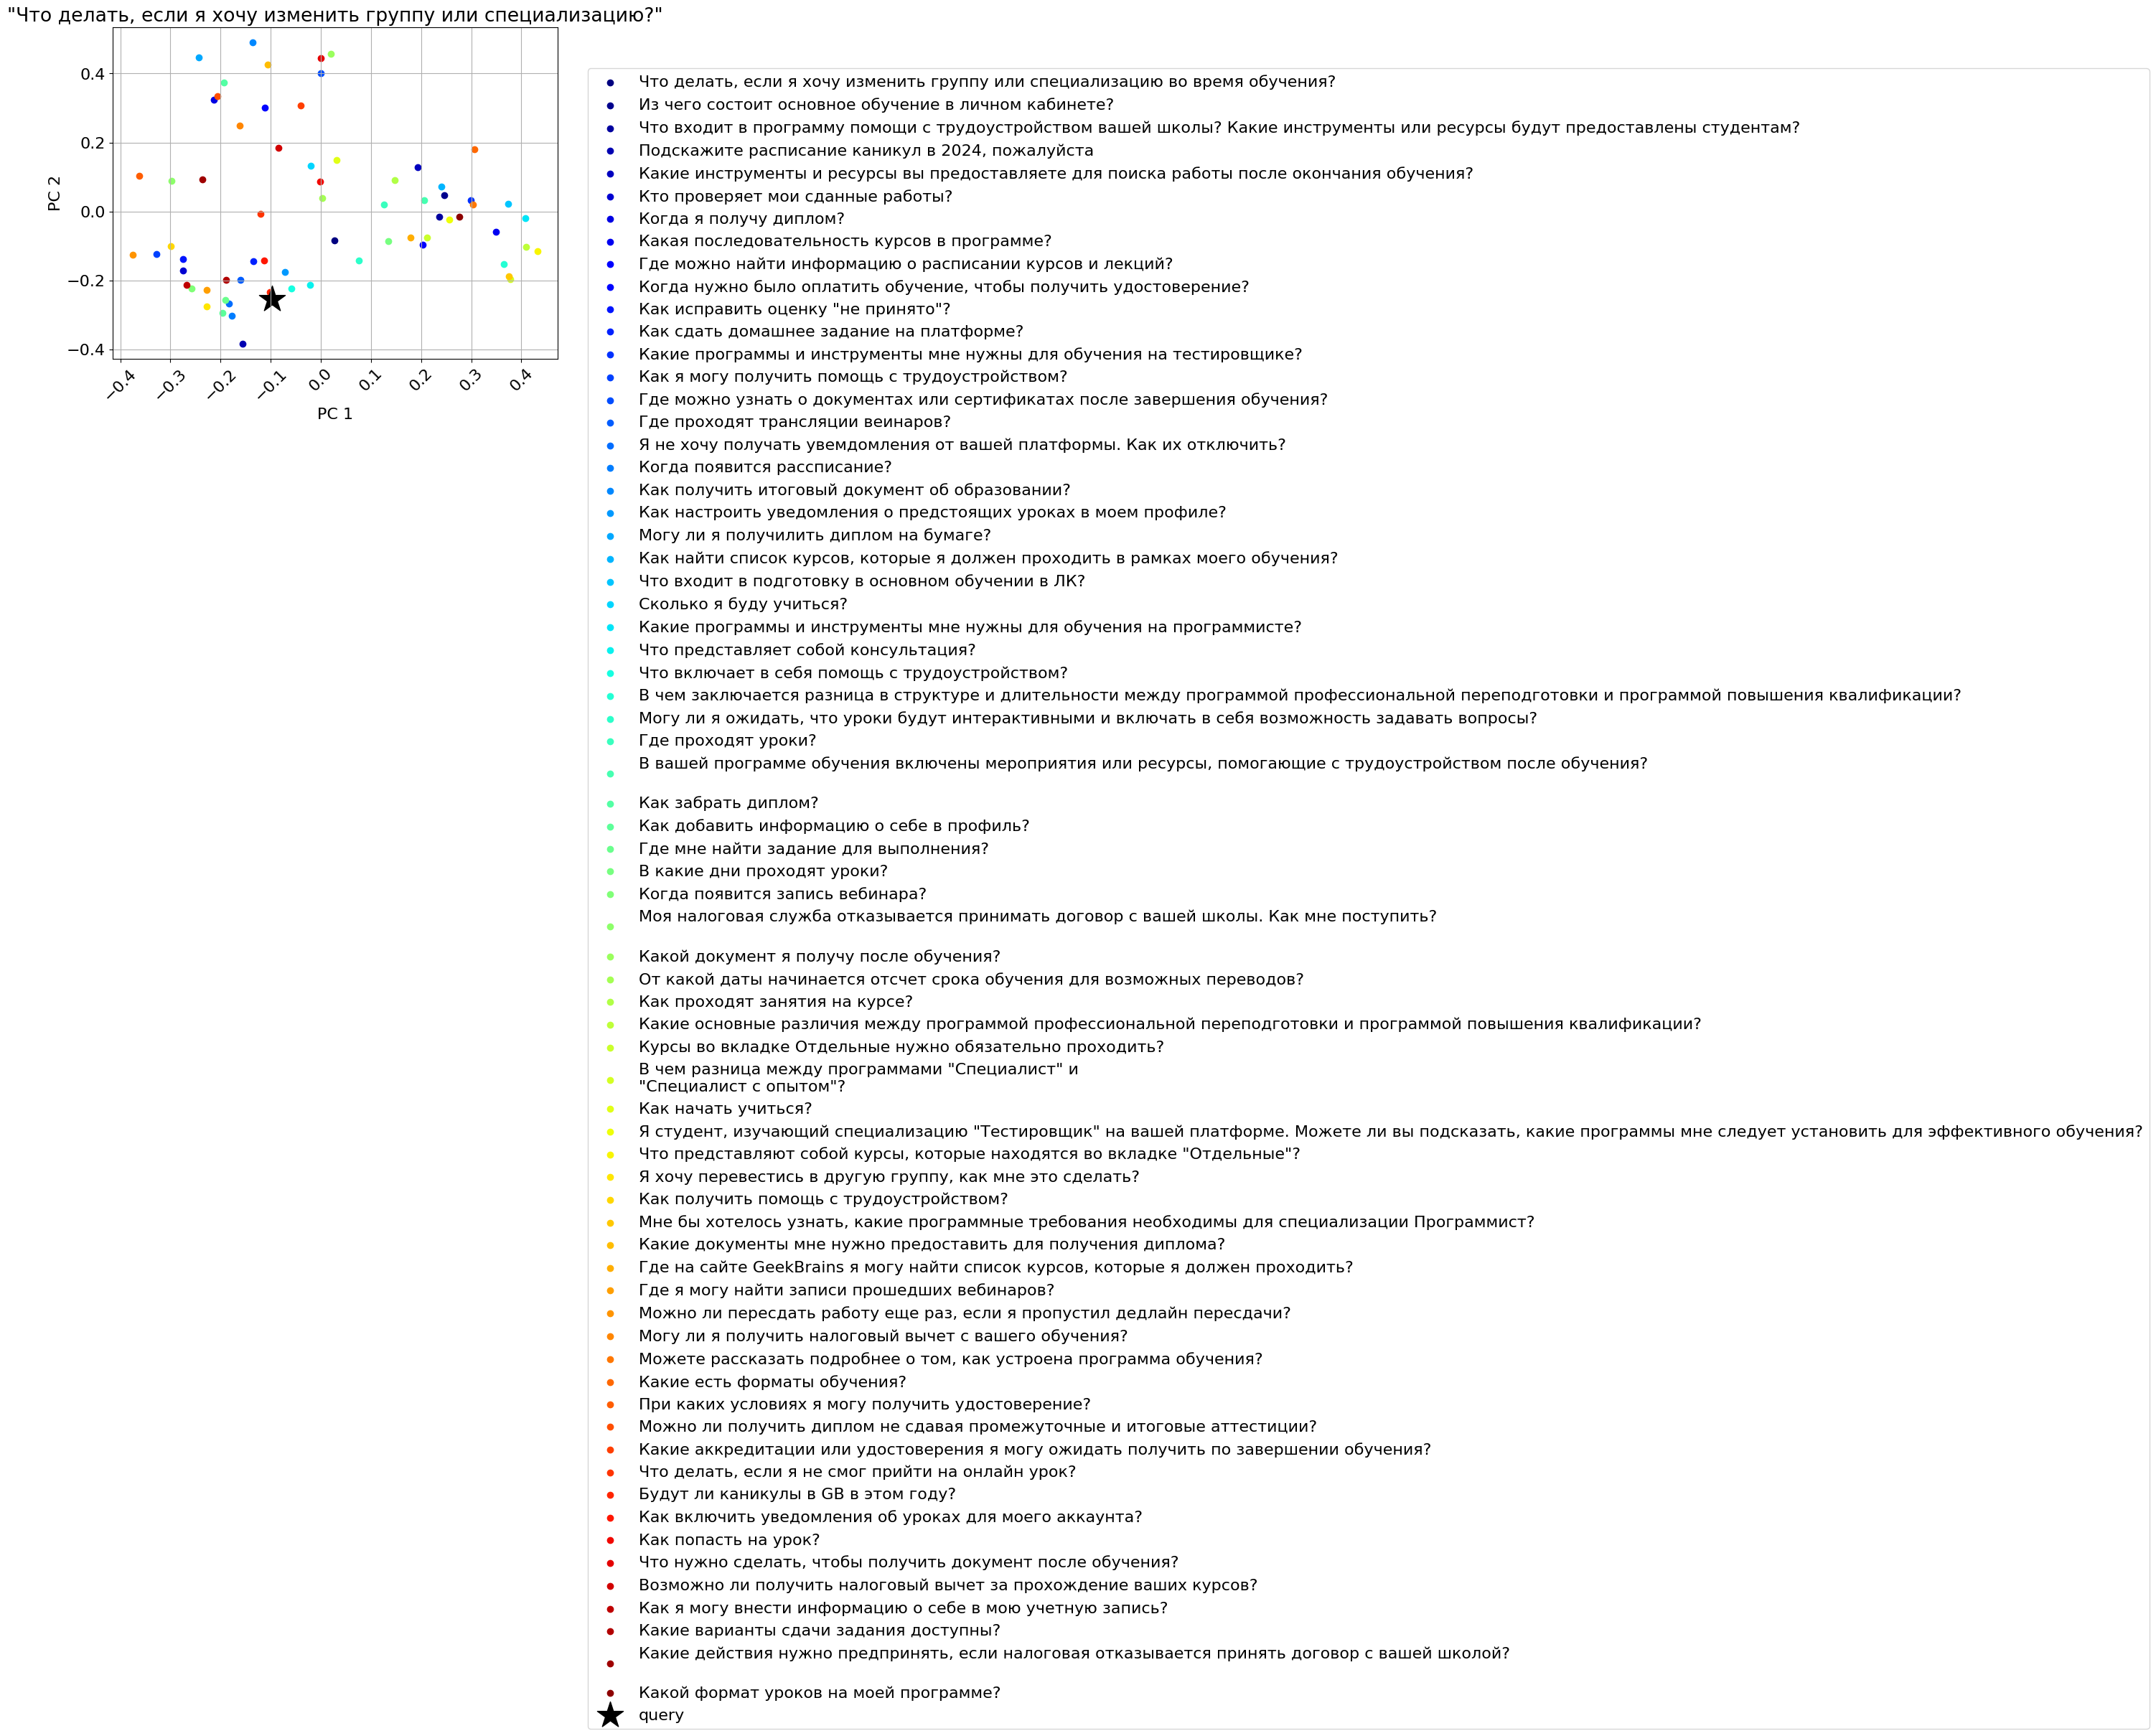

In [ ]:
# plot query along with resumes using PCA components
query_pca = pca.transform(query_embedding.reshape(1, -1))[0]

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 16})
plt.grid()

c=0
cmap = mpl.colormaps['jet']
for role in df_q_a['Question'].unique():
    idx = np.where(df_q_a['Question']==role)
    plt.scatter(pca.transform(embedding_arr)[idx,0], pca.transform(embedding_arr)[idx,1], c=[cmap(c)]*len(idx[0]), label=role)
    c = c + 1/len(df_q_a['Question'].unique())

plt.scatter(query_pca[0], query_pca[1], c='k', marker='*', s=750, label='query')

plt.legend(bbox_to_anchor=(1.05, 0.9))
plt.xticks(rotation = 45)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('"' + query + '"')
plt.show()

Рассчет метрик

In [ ]:
def hash_classifying(dataframe):

    c = []

    for question in dataframe.Question:
      c.append(predict_class(question))

    for i in range(len(dataframe)):
      dataframe.iloc[i,1] = c[i]

    dataframe = dataframe.drop(labels=['Question'], axis=1)
    return dataframe

In [ ]:
eval_df = pd.read_csv('eval.csv') #НЕ ЗАБУДЬТЕ ЗАГРУЗИТЬ ФАЙЛ
eval_df

In [ ]:
sample = pd.read_csv('sample_submission.csv')
sample['Question'] = eval_df['Question']
sample = sample.iloc[:69]
sample

In [ ]:
sample = hash_classifying(sample)
sample.to_csv('submission.csv', index=False)